In [36]:
from PIL import Image
from io import BytesIO
from glob import glob
from tqdm import tqdm

import os
import h5py
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio

In [2]:
data_dir = '/media/mountHDD3/data_storage/biomedical_data/isic/2024'
trimg_dir = os.path.join(data_dir, 'train-image')
trhdf5 = os.path.join(data_dir, 'train-image.hdf5')
tshdf5 = os.path.join(data_dir, 'test-image.hdf5')
trmeta = os.path.join(data_dir, 'train-metadata.csv')
tsmeta = os.path.join(data_dir, 'test-metadata.csv')
subform = os.path.join(data_dir, 'sample_submission.csv')

In [3]:
trdf = pd.read_csv(trmeta)
trhp = h5py.File(trhdf5, 'r')

/tmp/ipykernel_429043/20573071.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  trdf = pd.read_csv(trmeta)


In [4]:
ids = trdf['isic_id'].values.tolist()
print(len(ids))

401059


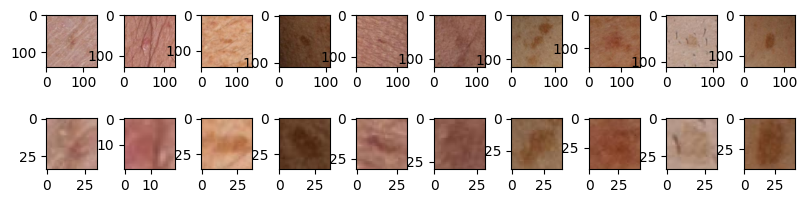

In [31]:
SAFE_PIX_RAG = 5
M2P = 3.7795275591

num_imgs = 10
fig, axs = plt.subplots(nrows = 2, ncols = num_imgs, figsize = (10, 2), gridspec_kw = {'wspace':0, 'hspace':1})

for idx, id in enumerate(ids[:num_imgs]):
    img = np.array(Image.open(BytesIO(trhp[id][()])))
    H, W, C = img.shape
    d = trdf[trdf['isic_id'] == id]['clin_size_long_diam_mm'].values.item()
    crop_range = math.ceil(d * M2P) + SAFE_PIX_RAG
    crop_img = img[H//2 - crop_range:H//2+crop_range, W//2 - crop_range:W//2+crop_range, :]

    axs[0][idx].imshow(img)
    axs[1][idx].imshow(crop_img)

plt.show()

# SafeRange = 0

In [42]:
sv_dir = os.path.join(data_dir, f'img_crop_0')
img_paths = glob(sv_dir + '/*')
sizes = {}

for img_path in tqdm(img_paths):
    img = iio.imread(img_path)
    size = img.shape[0]
    if size not in sizes:
        sizes[size] = 1
    else:
        sizes[size] += 1
print({key : sizes[key] for key in sorted(list(sizes.keys()))})

100%|███████████████████████████████████████████████████████| 401059/401059 [01:40<00:00, 3980.18it/s]

{1: 42, 2: 51, 3: 44, 4: 40, 5: 36, 6: 24, 7: 30, 8: 76, 9: 19, 10: 529, 11: 11, 12: 522, 13: 17, 14: 625, 15: 6, 16: 1000, 17: 12, 18: 1311, 19: 10, 20: 48367, 21: 6, 22: 69475, 23: 5, 24: 47718, 25: 6, 26: 43287, 27: 5, 28: 33430, 29: 2, 30: 22459, 31: 6, 32: 22806, 33: 2, 34: 16181, 35: 1, 36: 14548, 38: 11738, 39: 2, 40: 9374, 41: 1, 42: 8295, 43: 1, 44: 7019, 46: 5253, 48: 4829, 49: 1, 50: 4205, 51: 1, 52: 3401, 54: 3201, 56: 2667, 58: 2243, 60: 1873, 62: 1780, 64: 1394, 66: 1396, 68: 1072, 70: 1024, 71: 1, 72: 851, 74: 687, 76: 756, 78: 595, 80: 545, 82: 467, 84: 442, 86: 376, 88: 393, 90: 267, 92: 272, 94: 257, 96: 204, 98: 207, 100: 165, 102: 163, 104: 138, 106: 108, 108: 102, 110: 110, 112: 80, 114: 58, 116: 65, 118: 54, 120: 45, 122: 36, 124: 28, 126: 19, 128: 21, 130: 14, 132: 17, 134: 14, 136: 5, 138: 5, 140: 6, 142: 4, 144: 1, 150: 2}


<BarContainer object of 97 artists>

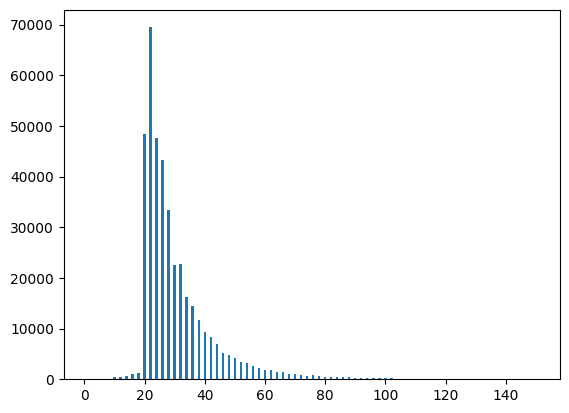

In [43]:
plt.bar(sizes.keys(), sizes.values())

100%|████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 175.70it/s]


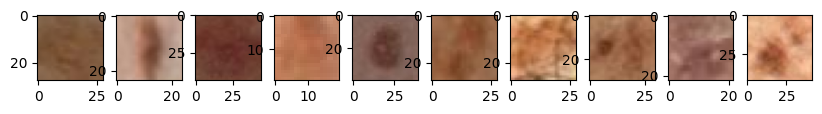

In [45]:
plt.figure(figsize = (10, 2))

idx = 0
for img_path in tqdm(img_paths[:num_imgs]):
    img = iio.imread(img_path)
    ax = plt.subplot(2, num_imgs, idx + 1)
    ax.imshow(img)
    idx += 1